In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [2]:
fashion=datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
type(train_images)

numpy.ndarray

In [4]:
type(train_labels)

numpy.ndarray

In [5]:
print(len(train_images))

60000


In [6]:
print(len(train_labels))

60000


In [7]:
print(len(test_images))

10000


In [8]:
print(train_images[0].shape)

(28, 28)


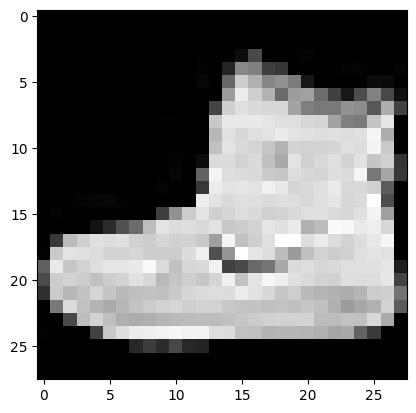

In [9]:
# Display image
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [10]:
print(train_labels[0])

9


In [11]:
# Normalize
train_images, test_images = train_images / 255.0, test_images / 255.0

In [12]:
# Reshape
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [13]:
train_images.shape

(60000, 28, 28, 1)

In [14]:
#CNN
# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = model.fit(train_images, train_labels, epochs=7,
                    validation_data=(test_images, test_labels))

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9282 - loss: 0.1946 - val_accuracy: 0.9009 - val_loss: 0.2778
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9333 - loss: 0.1807 - val_accuracy: 0.9114 - val_loss: 0.2565
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9390 - loss: 0.1648 - val_accuracy: 0.9101 - val_loss: 0.2491
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9437 - loss: 0.1471 - val_accuracy: 0.9068 - val_loss: 0.2731
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9472 - loss: 0.1399 - val_accuracy: 0.9128 - val_loss: 0.2819
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9534 - loss: 0.1236 - val_accuracy: 0.9068 - val_loss: 0.2839
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9560 - loss: 0.1136 - val_accuracy: 0.9053 - val_loss: 0.3008


In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9053 - loss: 0.3008

Test accuracy: 0.9053000211715698


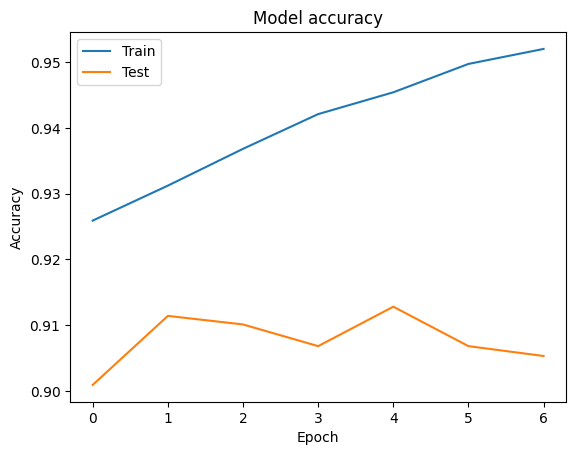

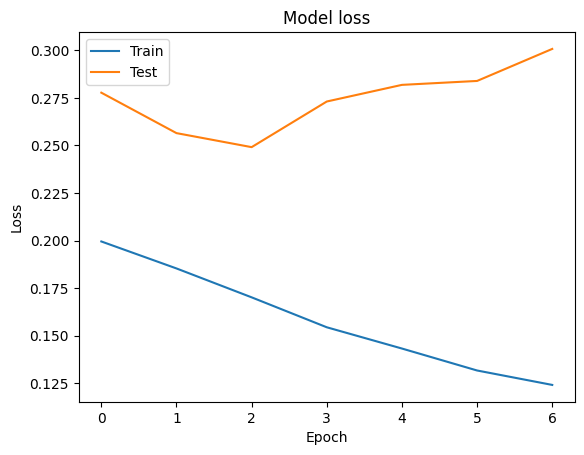

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
model.save('trained_fashion_mnist_model.h5')
model.save('trained_fashion_mnist_model.keras')